# Feature Handling
- Data Sanity Checks
- Data Completeness Checks

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('JobChange_train.csv')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106.0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69.0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4.0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26.0,0
4,21751,city_100,NaN,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88.0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18350 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18352 non-null  float64
 13  target                  18359 non-null  int64  
dtypes: float64(2), int64(2), object(10)
me

## Get Columns with Missing Values

In [21]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index     True
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours             True
target                    False
dtype: bool

In [22]:
df.columns[df.isnull().any()]

Index(['city_development_index', 'gender', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours'],
      dtype='object')

## Get Feature Names with more than 10 unique values

In [23]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'],
      dtype=object)

In [24]:
df.nunique() > 10

enrollee_id                True
city                       True
city_development_index     True
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                 True
company_size              False
company_type              False
last_new_job              False
training_hours             True
target                    False
dtype: bool

In [25]:
df.columns[df.nunique() > 10]

Index(['enrollee_id', 'city', 'city_development_index', 'experience',
       'training_hours'],
      dtype='object')

## Partition Data into X and y features

In [27]:
y = df['target']
X = df.drop(['enrollee_id','target'], axis = 1)

In [28]:
y

0        0
1        0
2        0
3        0
4        1
        ..
18354    0
18355    0
18356    0
18357    0
18358    0
Name: target, Length: 18359, dtype: int64

In [30]:
X.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106.0
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69.0
2,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4.0
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26.0
4,city_100,NaN,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88.0


## Get 2 lists 
- Numerical Column Name 
- Categorical Column Names

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18359 non-null  object 
 1   city_development_index  18350 non-null  float64
 2   gender                  14261 non-null  object 
 3   relevent_experience     18359 non-null  object 
 4   enrolled_university     18017 non-null  object 
 5   education_level         17902 non-null  object 
 6   major_discipline        15521 non-null  object 
 7   experience              18300 non-null  object 
 8   company_size            13580 non-null  object 
 9   company_type            13320 non-null  object 
 10  last_new_job            17992 non-null  object 
 11  training_hours          18352 non-null  float64
dtypes: float64(2), object(10)
memory usage: 1.7+ MB


In [34]:
numerical_columns = X.select_dtypes(include = ['number']).columns.tolist()
numerical_columns

['city_development_index', 'training_hours']

In [35]:
categorical_columns = X.select_dtypes(exclude = ['number']).columns.tolist()
categorical_columns

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

## Impute Numerical Features with Median

In [36]:
X['city_development_index'].isnull().sum()

9

In [37]:
X['city_development_index'].median()

0.91

In [38]:
X['city_development_index'] = X['city_development_index'].fillna(X['city_development_index'].median())

In [39]:
X['city_development_index'].isnull().sum()

0

## Impute Categorical Features with a constant value

In [40]:
X['gender'] = X['gender'].fillna('missing')

In [41]:
for feat in categorical_columns:
    X[feat] = X[feat].fillna('missing')

In [ ]:
for feat in categorical_columns:
    X[feat] = X[feat].fillna(X[feat].mode())

In [ ]:
X[categorical_columns] = X[categorical_columns].fillna('missing')

## Histogram Plot for Numerical Features

<AxesSubplot:ylabel='Frequency'>

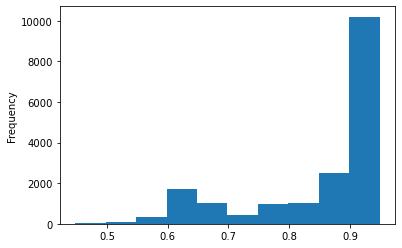

In [45]:
X['city_development_index'].plot.hist()

## Box Plot for Numerical Features

<AxesSubplot:>

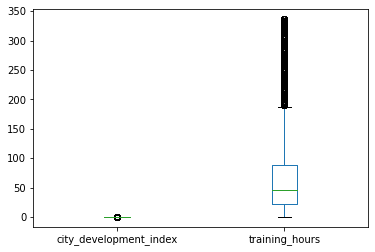

In [46]:
X.plot.box()

## Bar Plot for Categorical Features

<AxesSubplot:>

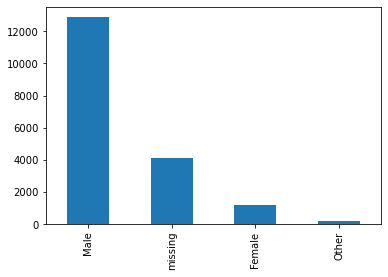

In [50]:
X['gender'].value_counts().plot.bar()